In [9]:
# uncomment the line below to enable realtime graphs
# %matplotlib ipympl

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from custom_interfaces.NeoInterface import NeoInterface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(False)
neo.breathing(False)
neo.metabolism(False)
neo.mob(True)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)
neo.resuscitation(False)
neo.pda(True)


# stabilize the model by calculating 60 seconds
neo.calculate(60)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.2 sec. Average model step in 0.0265 ms.


In [15]:
models["Pda"].open_ductus(5.0, 5.0)
#models["Pda"].close_ductus(5.0)

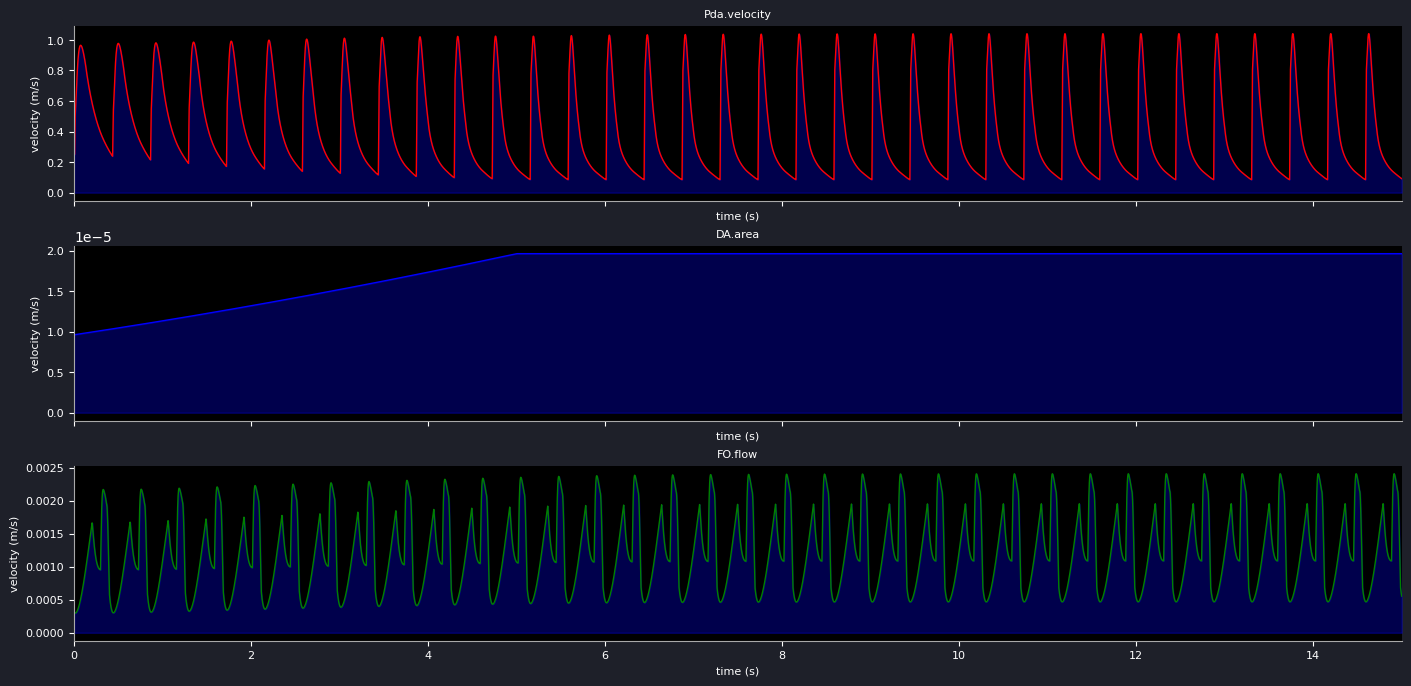


Pda.velocity    : max    1.04108 min     0.0849
DA.area         : max      2e-05 min      1e-05
FO.flow         : net   74.76189, forward   74.76189, backward        0.0 ml/min, stroke volume:      0.534 ml, 


In [16]:
models["Pda"].set_non_linear_factor(1.0)
neo.plot_time_graph(
    ["Pda.velocity", "DA.area", "FO.flow"], combined=False, sharey=False, time_to_calculate=15.0, sampleinterval=0.0005, ylabel="velocity (m/s)"
)

In [17]:
neo.analyze(["FO.flow"], weight_based=True)


Stroke volume calculation might be inaccurate. Try using a sampleinterval of 0.0005
FO.flow         : net   23.32768, forward   23.32768, backward        0.0 ml/kg/min, stroke volume:    0.16663 ml/kg, 


{'FO.flow.sv': 0.16663,
 'FO.flow.net': 23.32768,
 'FO.flow.forward': 23.32768,
 'FO.flow.backward': 0.0}

In [18]:
neo.analyze_heart()


LA_LV.flow      : net  300.35857, forward  300.35857, backward        0.0 ml/kg/min, stroke volume:     2.1454 ml/kg, 
RA_RV.flow      : net  199.62521, forward  199.62521, backward        0.0 ml/kg/min, stroke volume:    1.42588 ml/kg, 
RV_PA.flow      : net  199.25453, forward  199.25453, backward        0.0 ml/kg/min, stroke volume:    1.42323 ml/kg, 
LV_AA.flow      : net  299.86915, forward  299.86915, backward        0.0 ml/kg/min, stroke volume:     2.1419 ml/kg, 
IVCI_RA.flow    : net   97.43142, forward  104.26656, backward   -6.83514 ml/kg/min, stroke volume:    0.69593 ml/kg, 
SVC_RA.flow     : net   76.56289, forward   82.58102, backward   -6.01813 ml/kg/min, stroke volume:    0.54687 ml/kg, 
LA.pres_in      : max   11.70031, min    3.64742 mmHg
RA.pres_in      : max    8.66676, min    2.72935 mmHg
LV.pres_in      : max   61.27922, min    2.12812 mmHg
RV.pres_in      : max   54.73573, min    1.88499 mmHg
AA.pres_in      : max   60.58706, min   35.75789 mmHg
IVCI.pres_in   